<a href="https://colab.research.google.com/github/snchimata/airbnb_boston_sentiment_analysis/blob/master/Colab's_New_Code_Editor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [408]:
import io
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#!pip install plotly-express
import plotly_express as px

from sklearn.metrics import *

In [2]:
calender = pd.read_csv("calendar.csv") 
listings = pd.read_csv("listings.csv") 
reviews = pd.read_csv("reviews.csv")

In [131]:
listings = pd.read_csv("listings.csv") 

In [3]:
reviews = reviews.dropna()

In [4]:
reviews.head()

listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...  
2  We really enjoyed our stay at Islams house. Fr...  
3  The room was nice and clean and so were the co...  
4  Great location. Just 5 mins walk from the Airp...

In [5]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment = reviews['comments'].apply(lambda x : sid.polarity_scores(x))
reviews=pd.concat([reviews,sentiment.apply(pd.Series)],1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saiya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
reviews['compound'] = reviews['compound'].round(1)
reviews.head()

listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  neg    neu    pos  \
0  My stay at islam's place was really cool! Good...  0.0  0.648  0.352   
1  Great location for both airport and city - gre...  0.0  0.639  0.361   
2  We really enjoyed our stay at Islams house. Fr...  0.0  0.767  0.233   
3  The room was nice and clean and so were the co...  0.0  0.673  0.327   
4  Great location. Just 5 mins walk from the Airp...  0.0  0.637  0.363   

   compound  
0       1.0  
1       0.9  
2       1.0  
3       0.9  
4       0.9

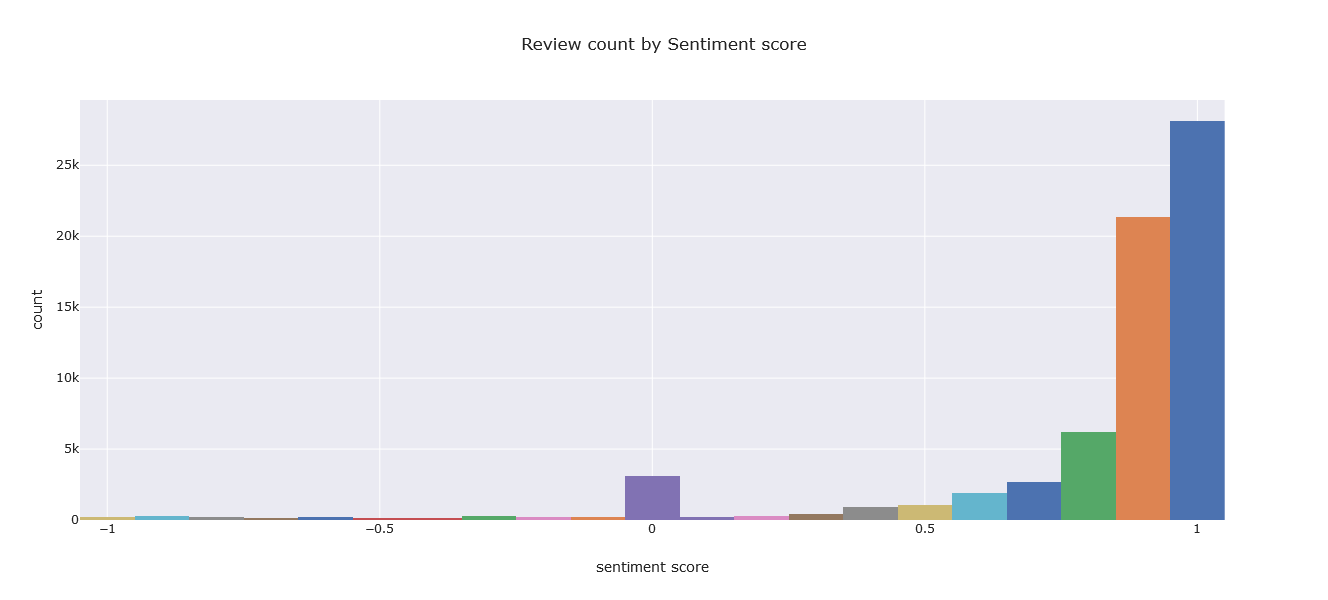

In [7]:
fig = px.histogram(x="compound",data_frame=reviews 
             ,title="Review count by Sentiment score"
             ,color="compound"
             ,template='seaborn'
             ,labels={"compound": "sentiment score"}
             )
fig.update_layout(showlegend=False)

In [19]:
#plt.figure(figsize=(28,28))
px.scatter_3d(data_frame=listings,x="price"
            ,y="number_of_reviews"
            ,z="review_scores_rating"
            ,color="number_of_reviews"
            ,template='seaborn'
            ,labels={"number_of_reviews": "number of reviews","review_scores_rating": "review scores rating"})

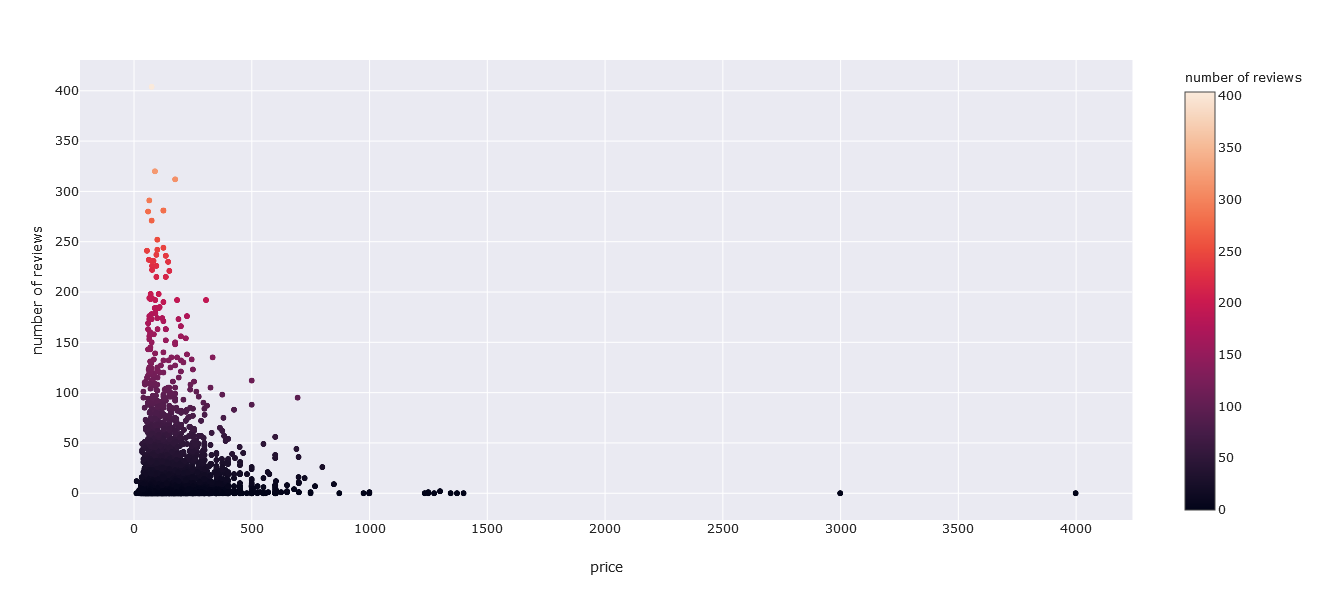

In [9]:
px.scatter(data_frame=listings,x="price"
            ,y="number_of_reviews"
            ,color="number_of_reviews"
            ,template='seaborn'
            ,labels={"number_of_reviews": "number of reviews"})

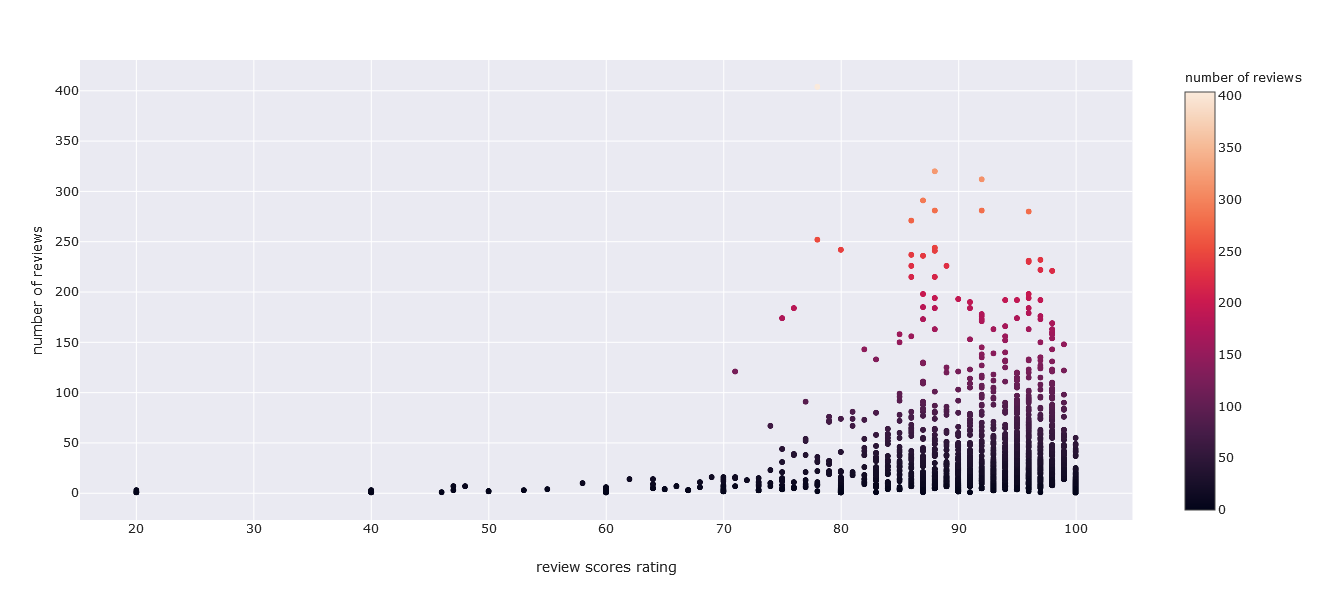

In [10]:
px.scatter(data_frame=listings,
           x="review_scores_rating",
           y="number_of_reviews"
           ,color="number_of_reviews"
           ,template='seaborn'
           ,labels={"number_of_reviews": "number of reviews","review_scores_rating": "review scores rating"})

In [11]:
!pip install WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [12]:
text = " ".join(review for review in reviews.comments)
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 24126265 words in the combination of all reviews.


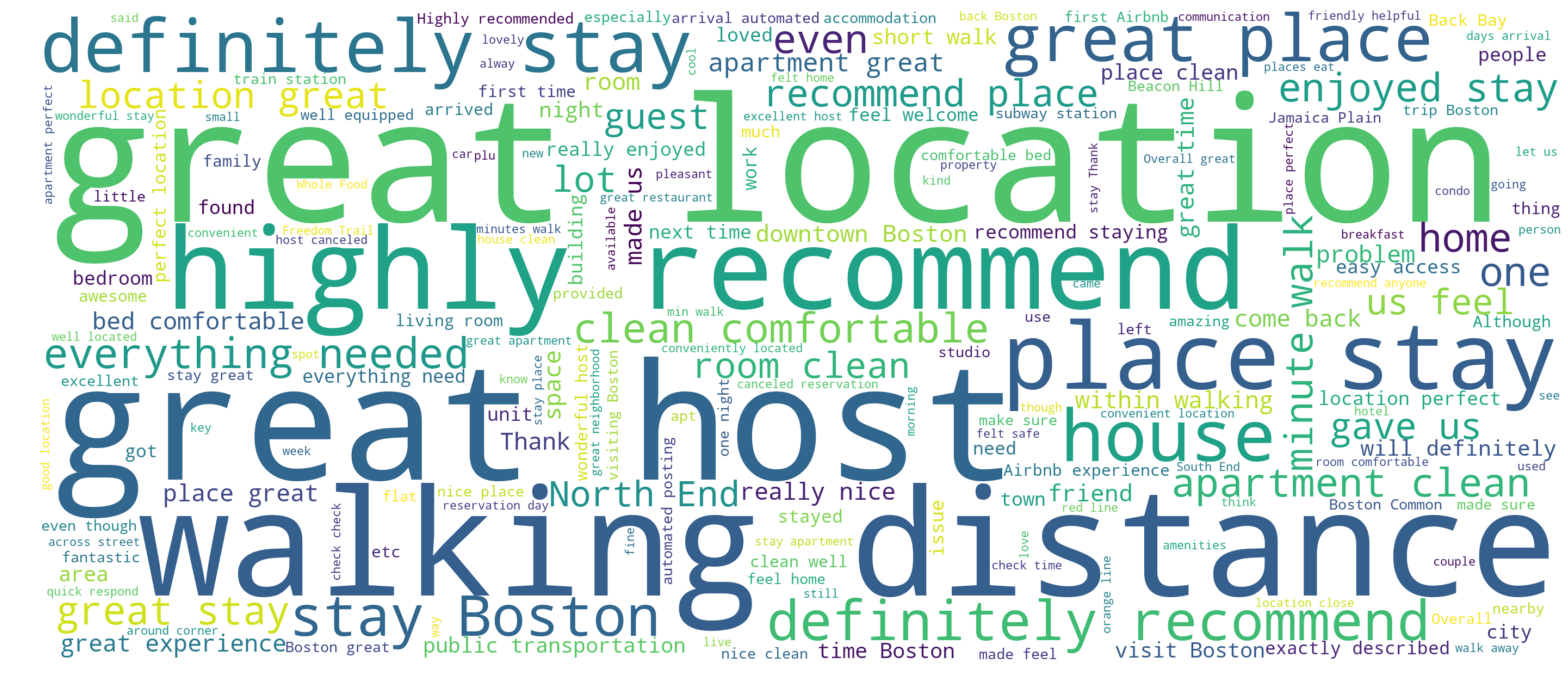

In [15]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Lisa", "Sean", "Brian", "Izzy"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width = 2800, height = 1200).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(28,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [95]:
listings.describe(include='all')

id                            listing_url     scrape_id  \
count   3.585000e+03                                   3585  3.585000e+03   
unique           NaN                                   3585           NaN   
top              NaN  https://www.airbnb.com/rooms/10730102           NaN   
freq             NaN                                      1           NaN   
mean    8.440875e+06                                    NaN  2.016091e+13   
std     4.500787e+06                                    NaN  8.516813e-01   
min     3.353000e+03                                    NaN  2.016091e+13   
25%     4.679319e+06                                    NaN  2.016091e+13   
50%     8.577620e+06                                    NaN  2.016091e+13   
75%     1.278953e+07                                    NaN  2.016091e+13   
max     1.493346e+07                                    NaN  2.016091e+13   

       last_scraped                      name  \
count          3585                      3585   
unique            1                      3504   
top      2016-09-07  Lux 2BR by Fenway w/WiFi   
freq           3585                         8   
mean            NaN                       NaN   
std             NaN                       NaN   
min             NaN                       NaN   
25%             NaN                       NaN   
50%             NaN                       NaN   
75%             NaN                       NaN   
max             NaN                       NaN   

                                                  summary  \
count                                                3442   
unique                                               3113   
top     The unit is stylishly designed for comfort, va...   
freq                                                   21   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                    space  \
count                                                2528   
unique                                               2268   
top     The studio's kitchenette comes equipped with a...   
freq                                                   17   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              description experiences_offered  \
count                                                3585                3585   
unique                                               3423                   1   
top     Private room in a HOSTEL exclusive for Airbnb ...                none   
freq                                                    7                3585   
mean                                                  NaN                 NaN   
std                                                   NaN                 NaN   
min                                                   NaN                 NaN   
25%                                                   NaN                 NaN   
50%                                                   NaN                 NaN   
75%                                                   NaN                 NaN   
max                                                   NaN                 NaN   

                                    neighborhood_overview  ...  \

In [96]:
listings.shape

(3585, 95)

In [97]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [98]:
sorted(listings.columns)

['access',
 'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'cleaning_fee',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'first_review',
 'guests_included',
 'has_availability',
 'host_about',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_name',
 'host_neighbourhood',
 'host_picture_url',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'house_rules',
 'id',
 'instant_bookable',
 'interaction',
 'is_location_exact',
 'jurisdiction_names',
 'last_review',
 'last_scraped',
 'latitude',
 'license',
 'listing_url

In [141]:
listings.isnull().sum().sort_values(ascending=False).head(20)

neighbourhood_group_cleansed    3585
jurisdiction_names              3585
license                         3585
has_availability                3585
square_feet                     3529
monthly_price                   2697
weekly_price                    2693
security_deposit                2243
notes                           1975
interaction                     1554
access                          1489
neighborhood_overview           1415
host_about                      1309
transit                         1290
house_rules                     1192
cleaning_fee                    1107
space                           1057
review_scores_accuracy           823
review_scores_location           822
review_scores_value              821
dtype: int64

In [353]:
# Feature engineering

columns_to_keep = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                   'neighbourhood_cleansed', 'zipcode', 'property_type', 'room_type',
                   'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
                   'extra_people','security_deposit','host_listings_count','availability_365',
                   'availability_60','availability_90','calculated_host_listings_count','reviews_per_month',
                   'number_of_reviews','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                   'review_scores_communication', 'review_scores_location',
                   'review_scores_value', 'requires_license', 'instant_bookable',
                   'cancellation_policy','cleaning_fee']


def clean_percentages(x):
    """ 
    cleans the percentages columns
    transforms data from 20% to 0.20
    """
    x = float(x[:-1])/100
    return x


    
def clean_zipcode(x):
    """
    cleans the zip code columns & converts zipcode to 5 digits
    """
    
    x = x[:5]
    return int(x)

In [354]:
listings_X = listings[columns_to_keep].copy()

In [352]:
#listings = pd.read_csv("listings.csv") 

In [355]:
# Unique Columns 
len(np.unique(columns_to_keep))

34

In [356]:
len(columns_to_keep)

34

In [357]:
# fill columns corresponding to fill_mode with their mode values
fill_by_mode = ['zipcode', 'host_response_time','property_type','host_response_rate','host_acceptance_rate']
for fill in fill_by_mode:
    listings_X[fill].fillna(listings_X[fill].mode()[0], inplace=True)


In [358]:
listings_X['zipcode'] = listings_X['zipcode'].apply(lambda x: clean_zipcode(x))

In [359]:
listings_X['price'] = listings_X.price.str.replace('$','').str.replace(',','').astype(float)
listings_X['cleaning_fee'] = listings_X.cleaning_fee.str.replace('$','').str.replace(',','').astype(float)
listings_X['security_deposit'] = listings_X.security_deposit.str.replace('$','').str.replace(',','').astype(float)

In [360]:
listings_X['host_response_rate'] = listings_X['host_response_rate'].apply(lambda x: clean_percentages(x))

In [361]:
listings_X['host_acceptance_rate'] = listings_X['host_acceptance_rate'].apply(lambda x: clean_percentages(x))

In [362]:
fill_by_mean = listings_X.select_dtypes(include=['int64', 'float64']).columns[listings_X.select_dtypes(include=['int64', 'float64']).isna().any()].tolist()
for fillmn in fill_by_mean:
    listings_X[fillmn].fillna(listings_X[fillmn].mean(), inplace=True)

In [370]:
final_data = pd.get_dummies(listings_X,drop_first=True)

In [371]:
# Splitting the dataset into the Training set and Test set
y = final_data[['price']]
X = final_data.drop('price', axis=1)

In [372]:
X.head()

host_response_rate  host_acceptance_rate  zipcode  accommodates  bathrooms  \
0                 1.0                  1.00     2131             4        1.5   
1                 1.0                  1.00     2131             2        1.0   
2                 1.0                  0.88     2131             2        1.0   
3                 1.0                  0.50     2116             4        1.0   
4                 1.0                  1.00     2131             2        1.5   

   bedrooms  beds  minimum_nights  security_deposit  host_listings_count  ...  \
0       2.0   3.0               2        324.698212                    1  ...   
1       1.0   1.0               2         95.000000                    1  ...   
2       1.0   1.0               3        324.698212                    1  ...   
3       1.0   2.0               1        100.000000                    1  ...   
4       1.0   2.0               2        324.698212                    1  ...   

   extra_people_$8.00  extra_people_$80.00  extra_people_$85.00  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

   extra_people_$88.00  extra_people_$89.00  extra_people_$9.00  \
0                    0                    0                   0   
1                    0                    0                   0   
2                    0                    0                   0   
3                    0                    0                   0   
4                    0                    0                   0   

   instant_bookable_t  cancellation_policy_moderate  \
0                   0                             1   
1                   1                             1   
2                   0                             1   
3                   0                             1   
4                   0                             0   

   cancellation_policy_strict  cancellation_policy_super_strict_30  
0                           0                                    0  
1                           0                                    0  
2                           0                                    0  
3                           0                                    0  
4                           0                                    0  

[5 rows x 120 columns]

In [373]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sscaler = StandardScaler()
scaled_features = sscaler.fit_transform(X.select_dtypes(include=['int64', 'float64']))
scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.select_dtypes(include=['int64', 'float64']).columns)
X= pd.concat([scaled_features_df,X.select_dtypes(exclude=['int64', 'float64'])], axis =1)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [374]:
mscaler = MinMaxScaler()
y = pd.DataFrame(mscaler.fit_transform(y), columns=y.columns)

In [375]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=88)

###Model

In [391]:
fit_params={
    'objective': 'regression',
    "early_stopping_rounds":20, 
    "eval_metric" : 'mae', 
    "eval_set" : [(X_test,y_test)],
    'eval_names': ['valid'],
    'verbose': 1000
}

In [404]:

import lightgbm as lgb
# instantiate model
clf = lgb.LGBMRegressor(num_leaves= 200, max_depth=10, 
                         random_state=88,
                         colsample_bytree=0.5,
                         subsample=0.75,
                         silent=True, 
                         metric='mae', 
                         n_jobs=-1, 
                         n_estimators=10000,
                         
                         learning_rate=0.001)

# Traning the model
clf.fit(X_train, y_train, **fit_params)


Training until validation scores don't improve for 20 rounds.
[1000]	valid's l1: 0.0143474
[2000]	valid's l1: 0.0118352
[3000]	valid's l1: 0.0110864
[4000]	valid's l1: 0.0108075
Early stopping, best iteration is:
[4877]	valid's l1: 0.0107057


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
       importance_type='split', learning_rate=0.001, max_depth=10,
       metric='mae', min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=200,
       objective=None, random_state=88, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=0.75, subsample_for_bin=200000,
       subsample_freq=0)

In [405]:
# predicting X_test
y_pred = clf.predict(X_test)

In [409]:
#Accuracy
mean_absolute_error = mean_absolute_error(y_pred,y_test)

In [410]:
# overall mean_absolute_error 
mean_absolute_error

0.010705744225450814

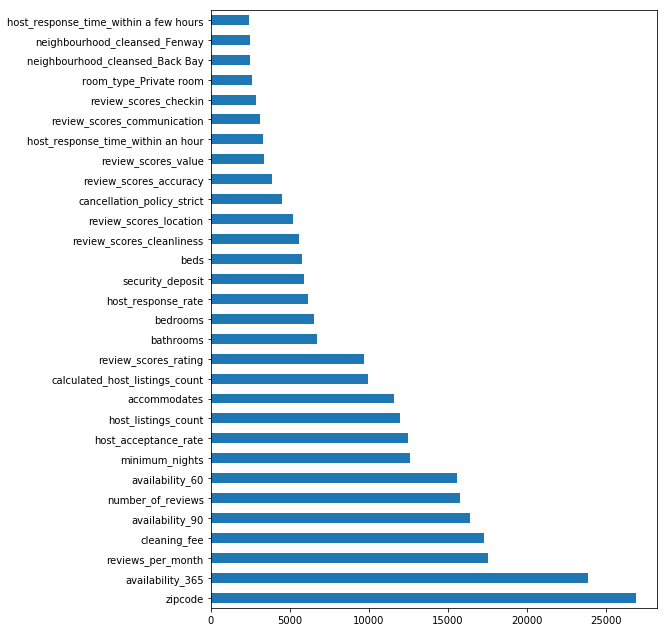

In [443]:
# Plotting features by importance
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,11))

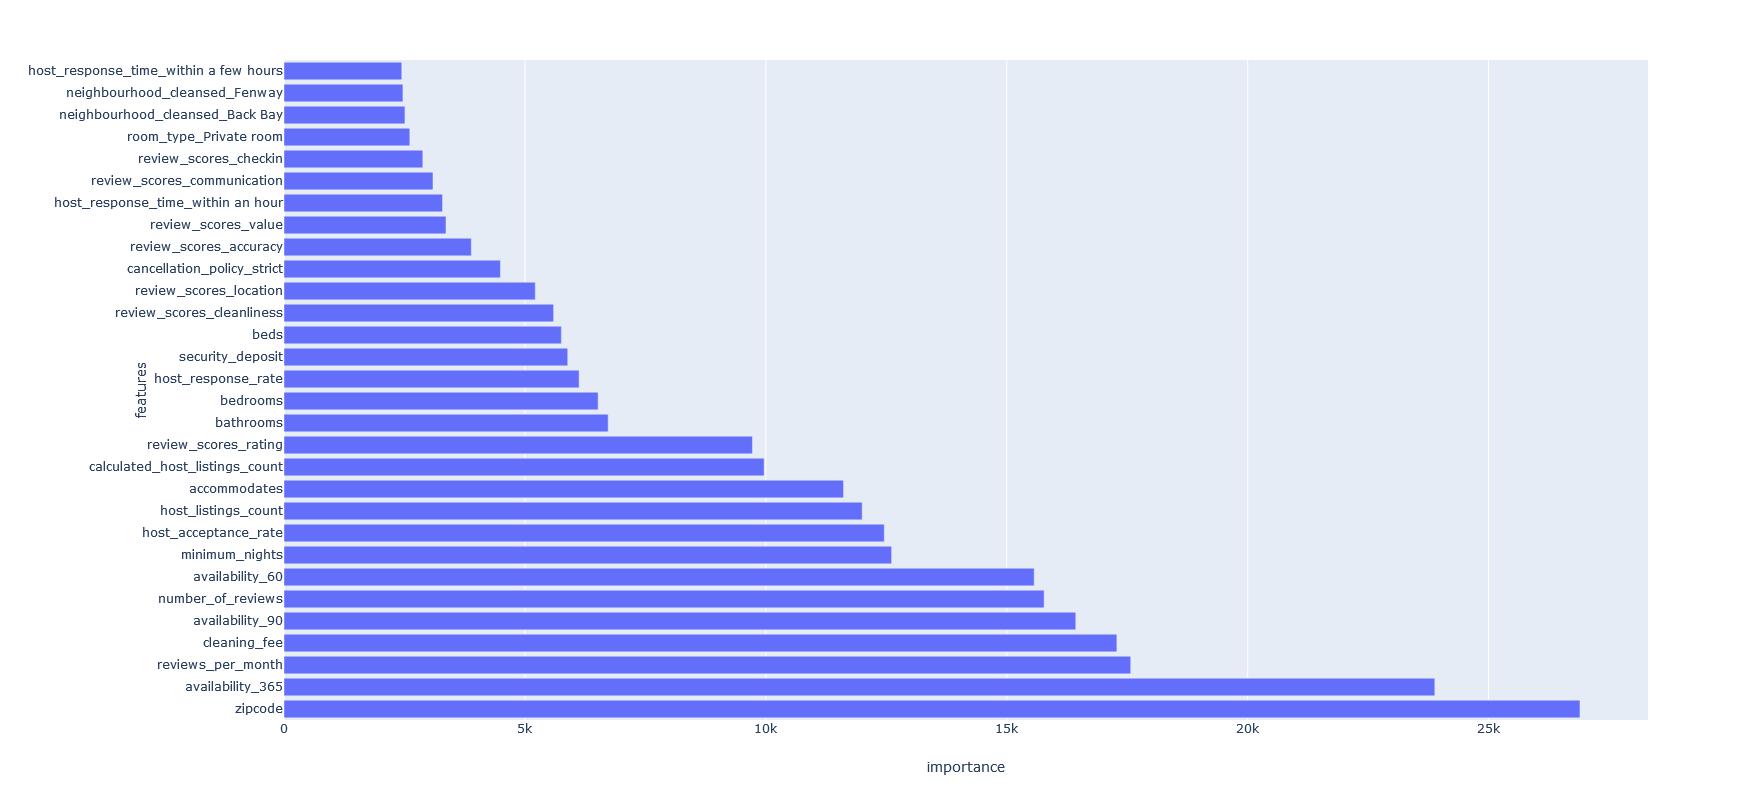

<Figure size 2016x1584 with 0 Axes>

In [452]:
plt.figure(figsize=(28,22))
px.bar(pd.DataFrame(feat_imp).reset_index().rename(columns={0:'importance','index':'features'}).sort_values('importance', ascending=False).head(30)
       ,x = 'importance', y = 'features',orientation='h',width=1200, height=800)